In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("../DataScraper/NBAScores.xlsx")
df.head()

,Unnamed: 0,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,0,MIA,MIA vs. ORL,04/09/2023,W,240,123,45,83,54.2,...,75.0,7,37,44,30,10,3,18,20,13
1,1,CLE,CLE vs. CHA,04/09/2023,L,240,95,35,89,39.3,...,93.8,11,33,44,27,9,5,16,24,-11
2,2,CHA,CHA @ CLE,04/09/2023,W,240,106,37,81,45.7,...,86.7,10,39,49,23,8,5,19,14,11
3,3,WAS,WAS vs. HOU,04/09/2023,L,240,109,41,97,42.3,...,61.9,14,37,51,28,11,5,13,21,-5
4,4,CHI,CHI vs. DET,04/09/2023,W,240,103,40,95,42.1,...,77.3,11,37,48,21,15,7,4,16,22


We will drop the first three columns and min and final points column as they arn't important. We will also transform the game date as year, since the specific date isn't important.

In [3]:
df.drop(columns=df.columns[0:3], axis=1,  inplace=True)
df.drop(columns=df.columns[2:4], axis=1,  inplace=True)
df.drop(columns=df.columns[-1], axis=1,  inplace=True)
df.head()

,Game Date,W/L,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,04/09/2023,W,45,83,54.2,18,44,40.9,15,20,75.0,7,37,44,30,10,3,18,20
1,04/09/2023,L,35,89,39.3,10,37,27.0,15,16,93.8,11,33,44,27,9,5,16,24
2,04/09/2023,W,37,81,45.7,6,32,18.8,26,30,86.7,10,39,49,23,8,5,19,14
3,04/09/2023,L,41,97,42.3,14,45,31.1,13,21,61.9,14,37,51,28,11,5,13,21
4,04/09/2023,W,40,95,42.1,6,30,20.0,17,22,77.3,11,37,48,21,15,7,4,16


In [4]:
def strip_last_four(s):
    return s[-4:]

df['Game Date'] = df['Game Date'].apply(strip_last_four)
df = df.rename(columns={'Game Date': 'Year'})
df.head()

,Year,W/L,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,2023,W,45,83,54.2,18,44,40.9,15,20,75.0,7,37,44,30,10,3,18,20
1,2023,L,35,89,39.3,10,37,27.0,15,16,93.8,11,33,44,27,9,5,16,24
2,2023,W,37,81,45.7,6,32,18.8,26,30,86.7,10,39,49,23,8,5,19,14
3,2023,L,41,97,42.3,14,45,31.1,13,21,61.9,14,37,51,28,11,5,13,21
4,2023,W,40,95,42.1,6,30,20.0,17,22,77.3,11,37,48,21,15,7,4,16


Seperate Wins and losses into seperate dataframes

In [5]:
df = df.rename(columns={'W/L': 'WinLoss', 'FG%': "FGpercent", '3P%':'threePcent', '3PM':'threeMade', '3PA':'threeAtt', 'FT%':'ftpercent'})
df['WinLoss'] = df['WinLoss'].replace({'W': 1, 'L': 0})
wins = df[df.WinLoss==1]
losses = df[df.WinLoss==0]
wins.head()


,Year,WinLoss,FGM,FGA,FGpercent,threeMade,threeAtt,threePcent,FTM,FTA,ftpercent,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,2023,1,45,83,54.2,18,44,40.9,15,20,75.0,7,37,44,30,10,3,18,20
2,2023,1,37,81,45.7,6,32,18.8,26,30,86.7,10,39,49,23,8,5,19,14
4,2023,1,40,95,42.1,6,30,20.0,17,22,77.3,11,37,48,21,15,7,4,16
7,2023,1,51,104,49.0,15,38,39.5,21,30,70.0,13,56,69,31,2,3,12,13
8,2023,1,53,101,52.5,14,32,43.8,14,19,73.7,13,37,50,31,10,5,13,23


In [6]:
def triStatPlots(attList):
    fig, plot = plt.subplots(3, 2, figsize=(20, 20))
    for i, stat in enumerate(attList):
        plot[i,0].scatter(stat[1], wins.WinLoss, label='wins', color='blue')
        plot[i,0].scatter(stat[0], losses.WinLoss, label='losses', color='red')
        plot[i,0].set_xlabel(stat[2])
        plot[i,0].set_ylabel('Win/Loss')
        plot[i,0].set_title('Win:Loss by ' +  stat[2])
        plot[i,1].boxplot([wins.FGA, losses.FGA], labels=['FGA For Wins', 'FGA For Losses'])
        plot[i,1].set_xlabel('Groups')
        plot[i,1].set_ylabel('Values')
        plot[i,1].set_title(stat[2] + ' win/loss')
    fig.tight_layout()

Field Goal Analysis

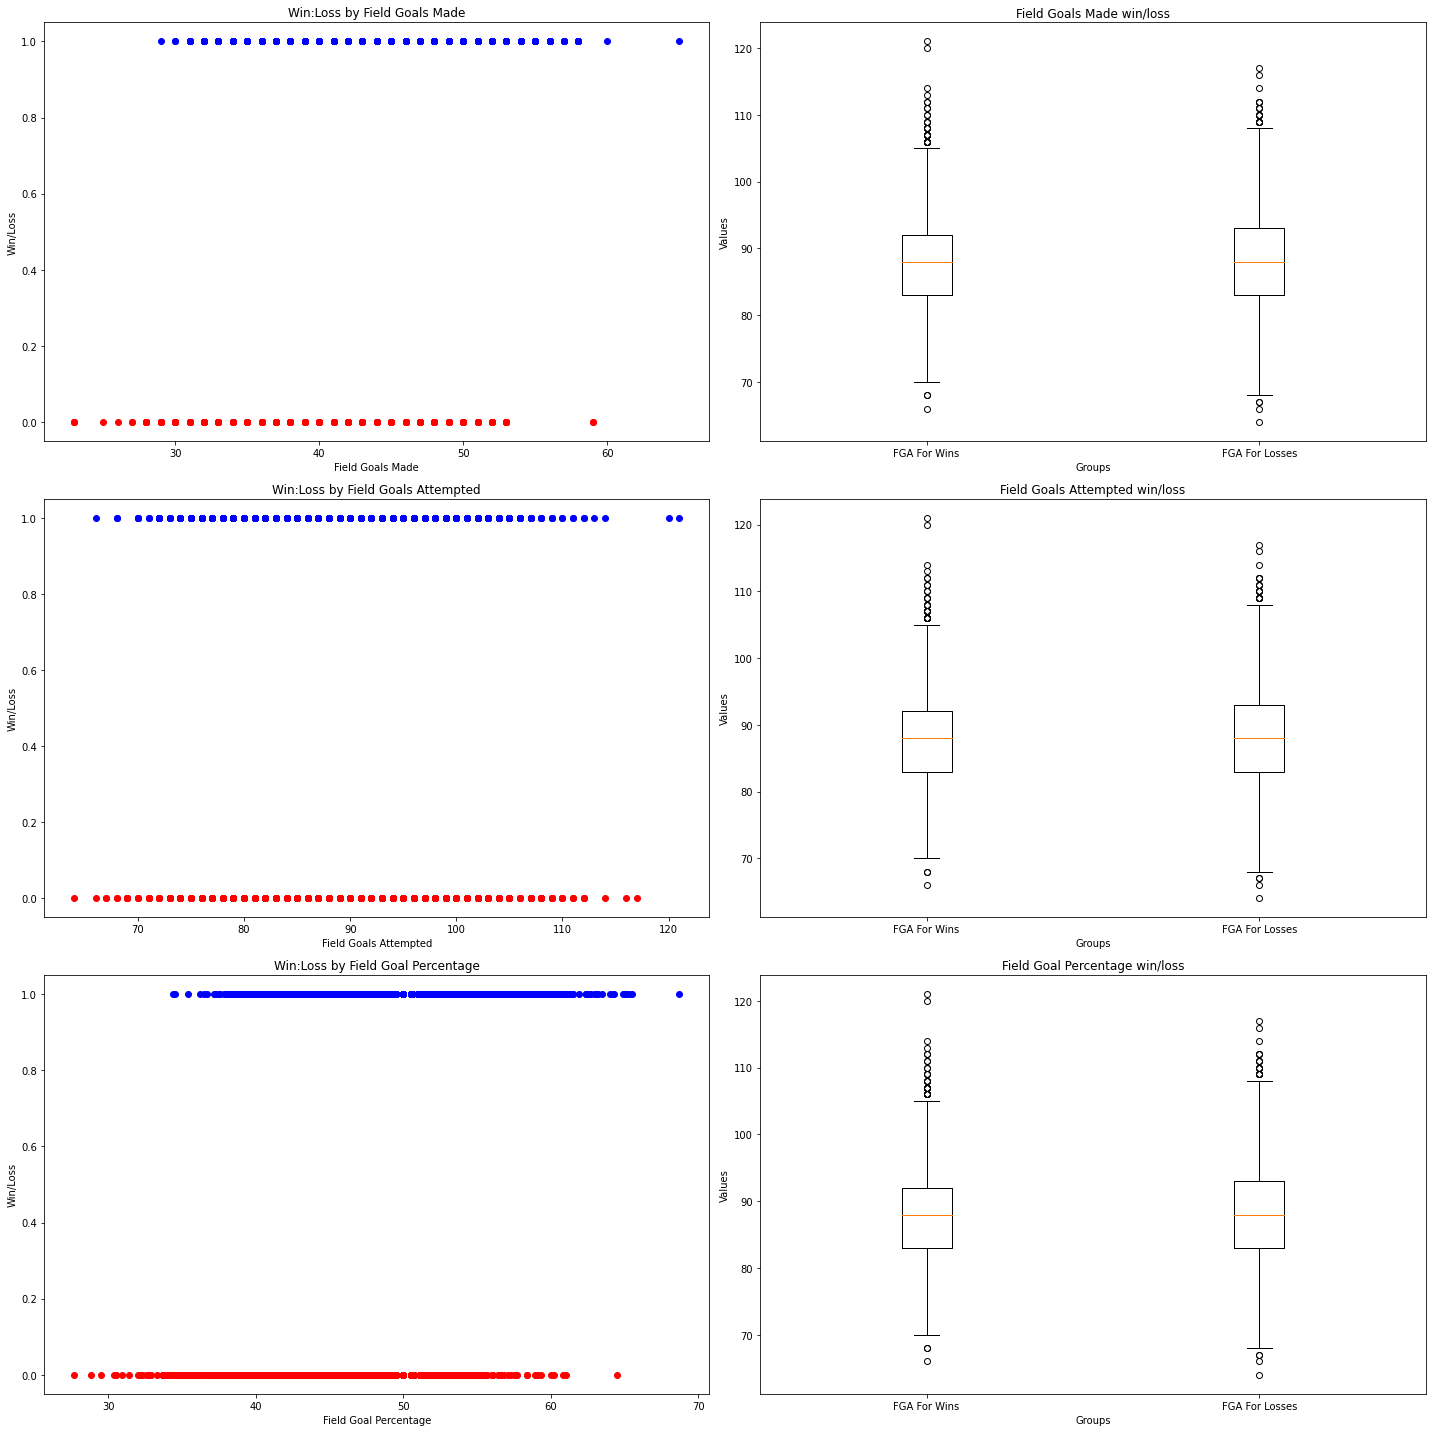

In [7]:
attList = [(losses.FGM, wins.FGM, 'Field Goals Made'), (losses.FGA, wins.FGA, 'Field Goals Attempted'), (losses.FGpercent, wins.FGpercent, 'Field Goal Percentage')]
triStatPlots(attList)

3 Point Analysis

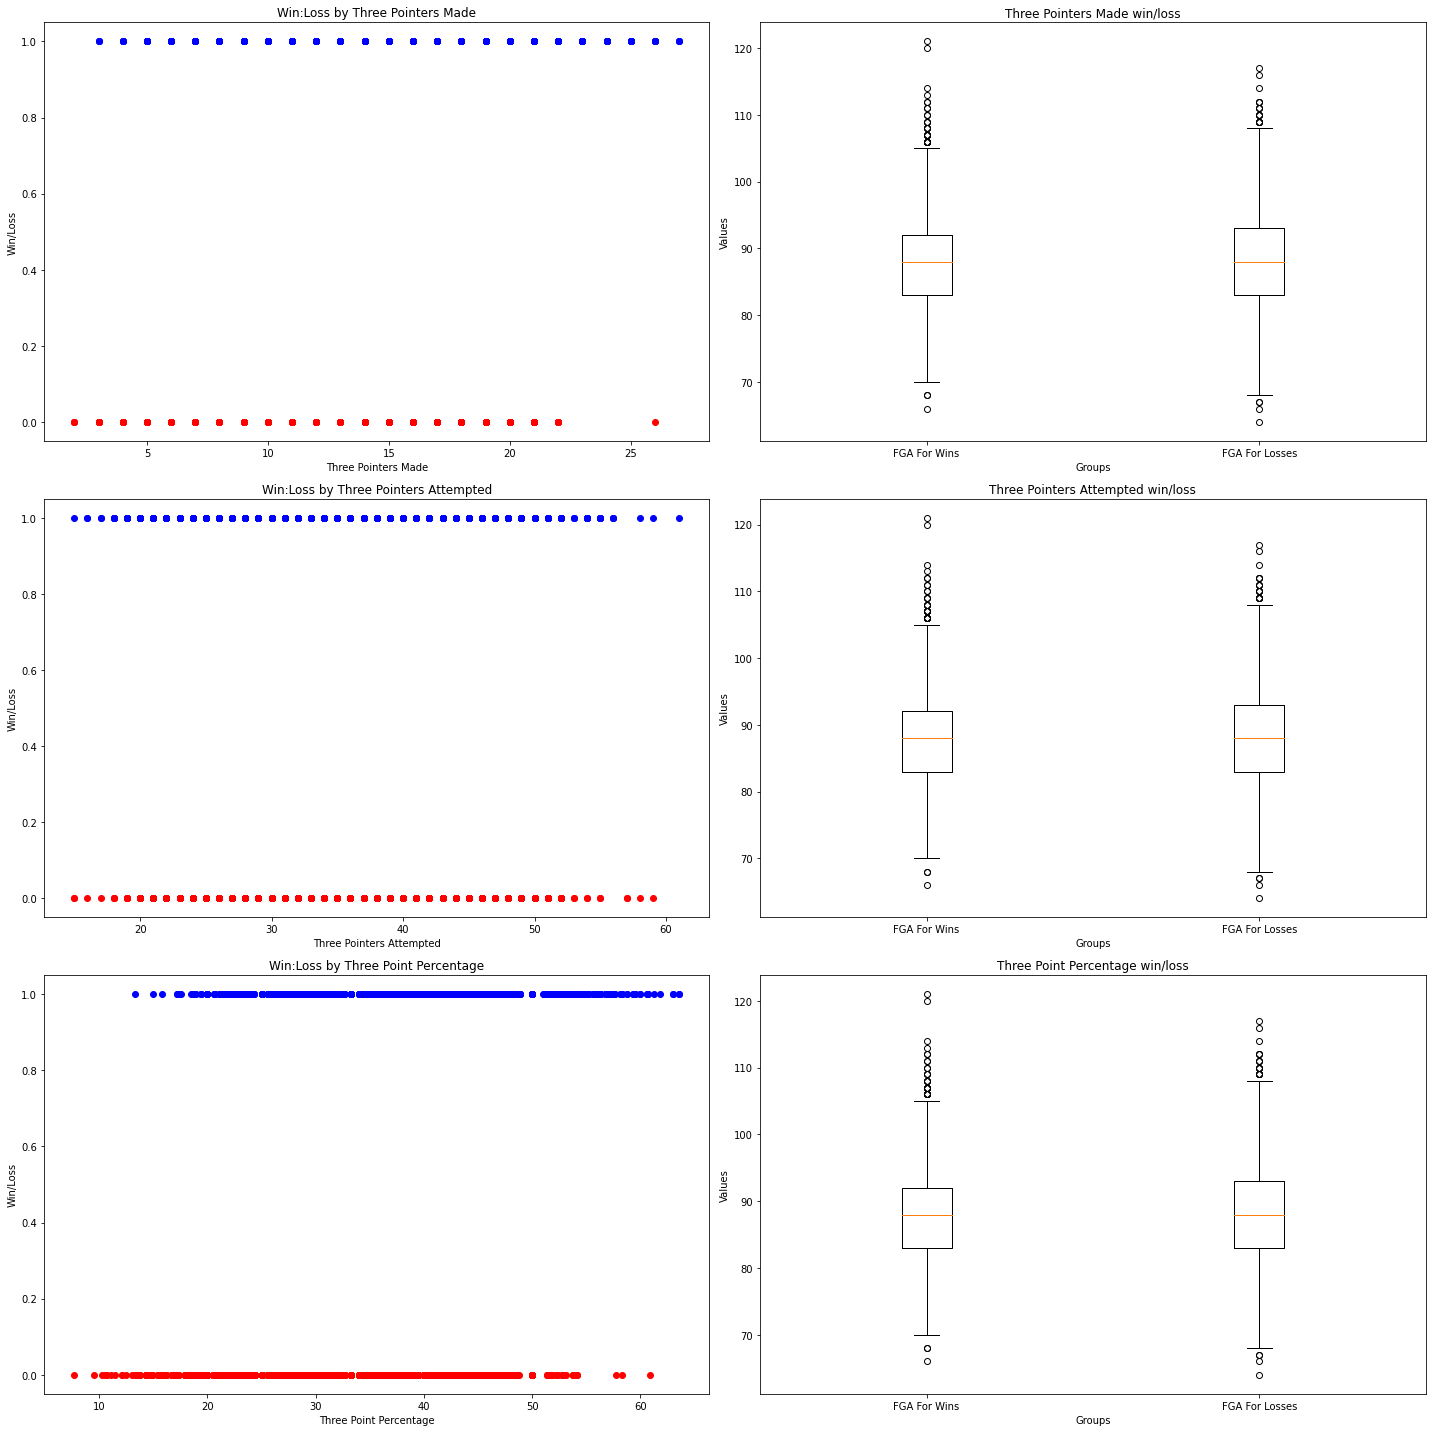

In [8]:
attList = [(losses.threeMade, wins.threeMade, 'Three Pointers Made'), (losses.threeAtt, wins.threeAtt, 'Three Pointers Attempted'), (losses.threePcent, wins.threePcent, 'Three Point Percentage')]
triStatPlots(attList)

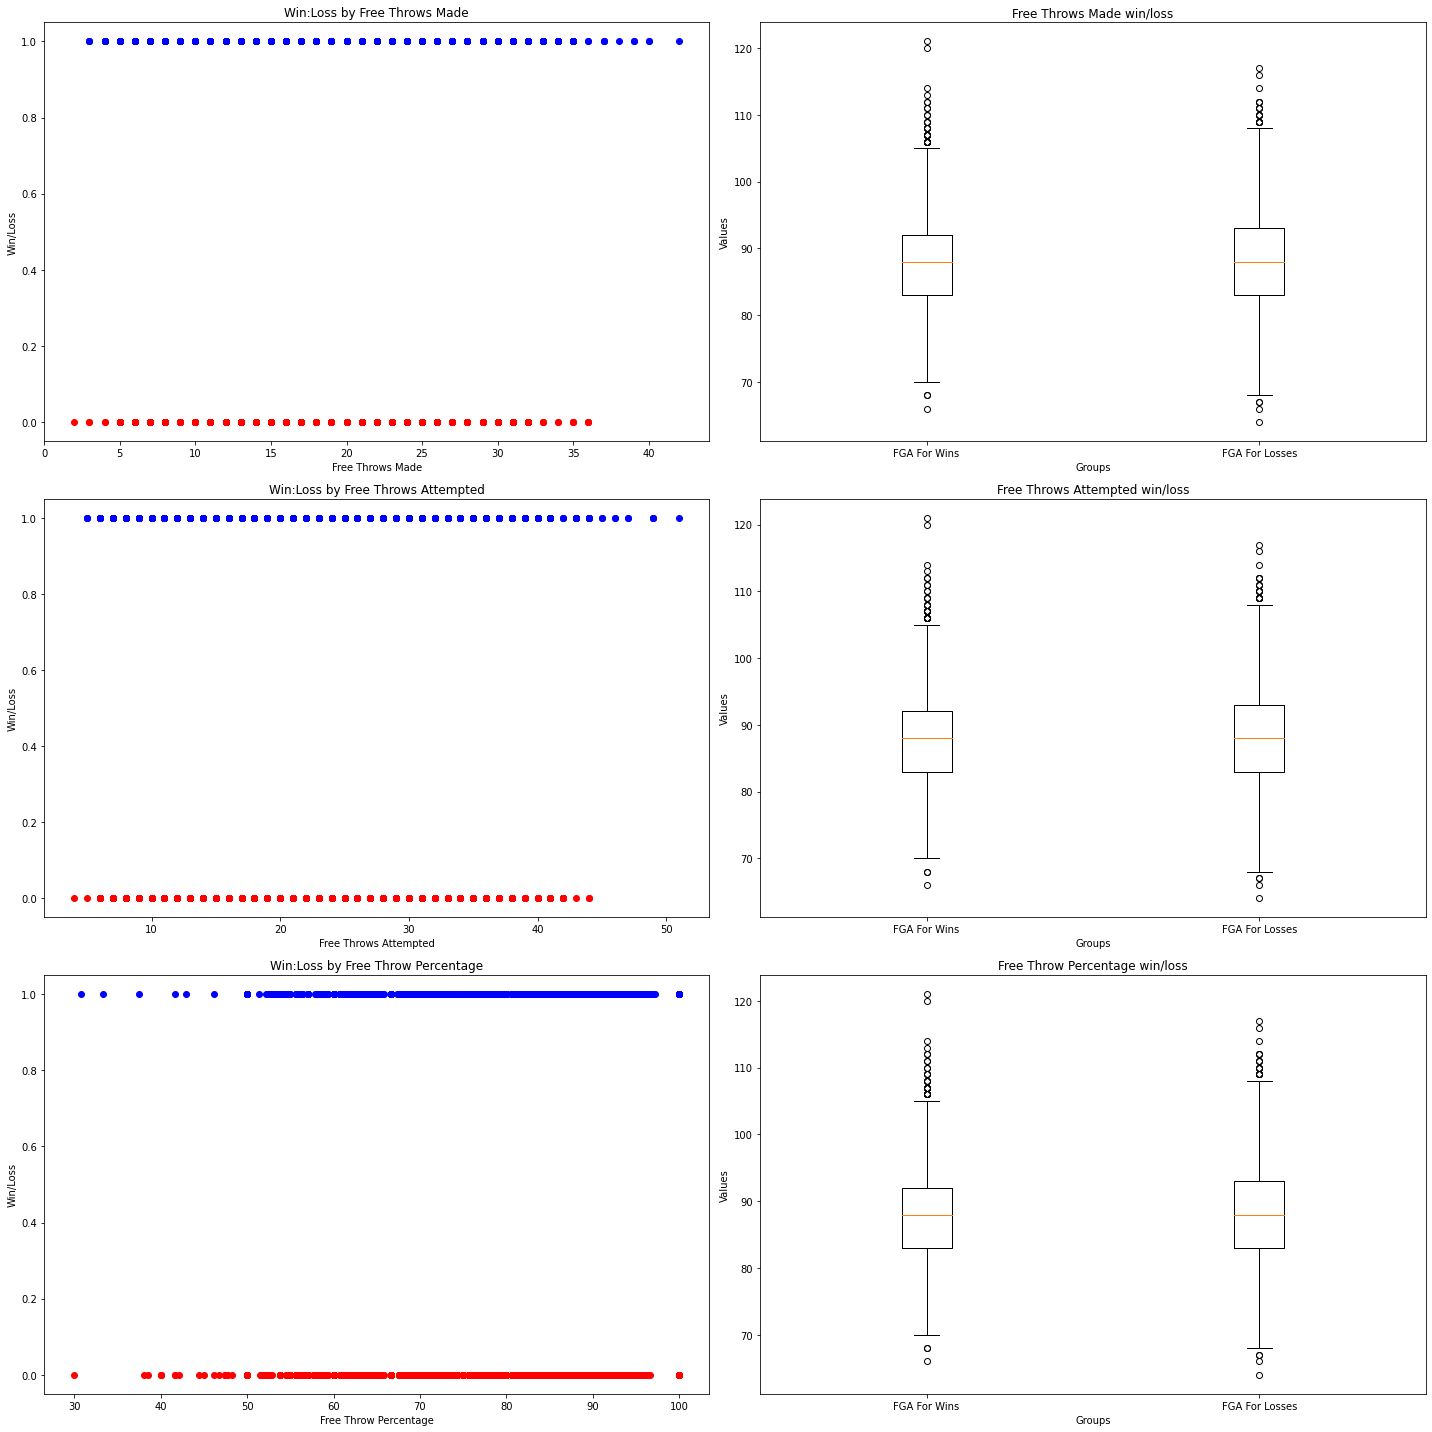

In [9]:
attList = [(losses.FTM, wins.FTM, 'Free Throws Made'), (losses.FTA, wins.FTA, 'Free Throws Attempted'), (losses.ftpercent, wins.ftpercent, 'Free Throw Percentage')]
triStatPlots(attList)

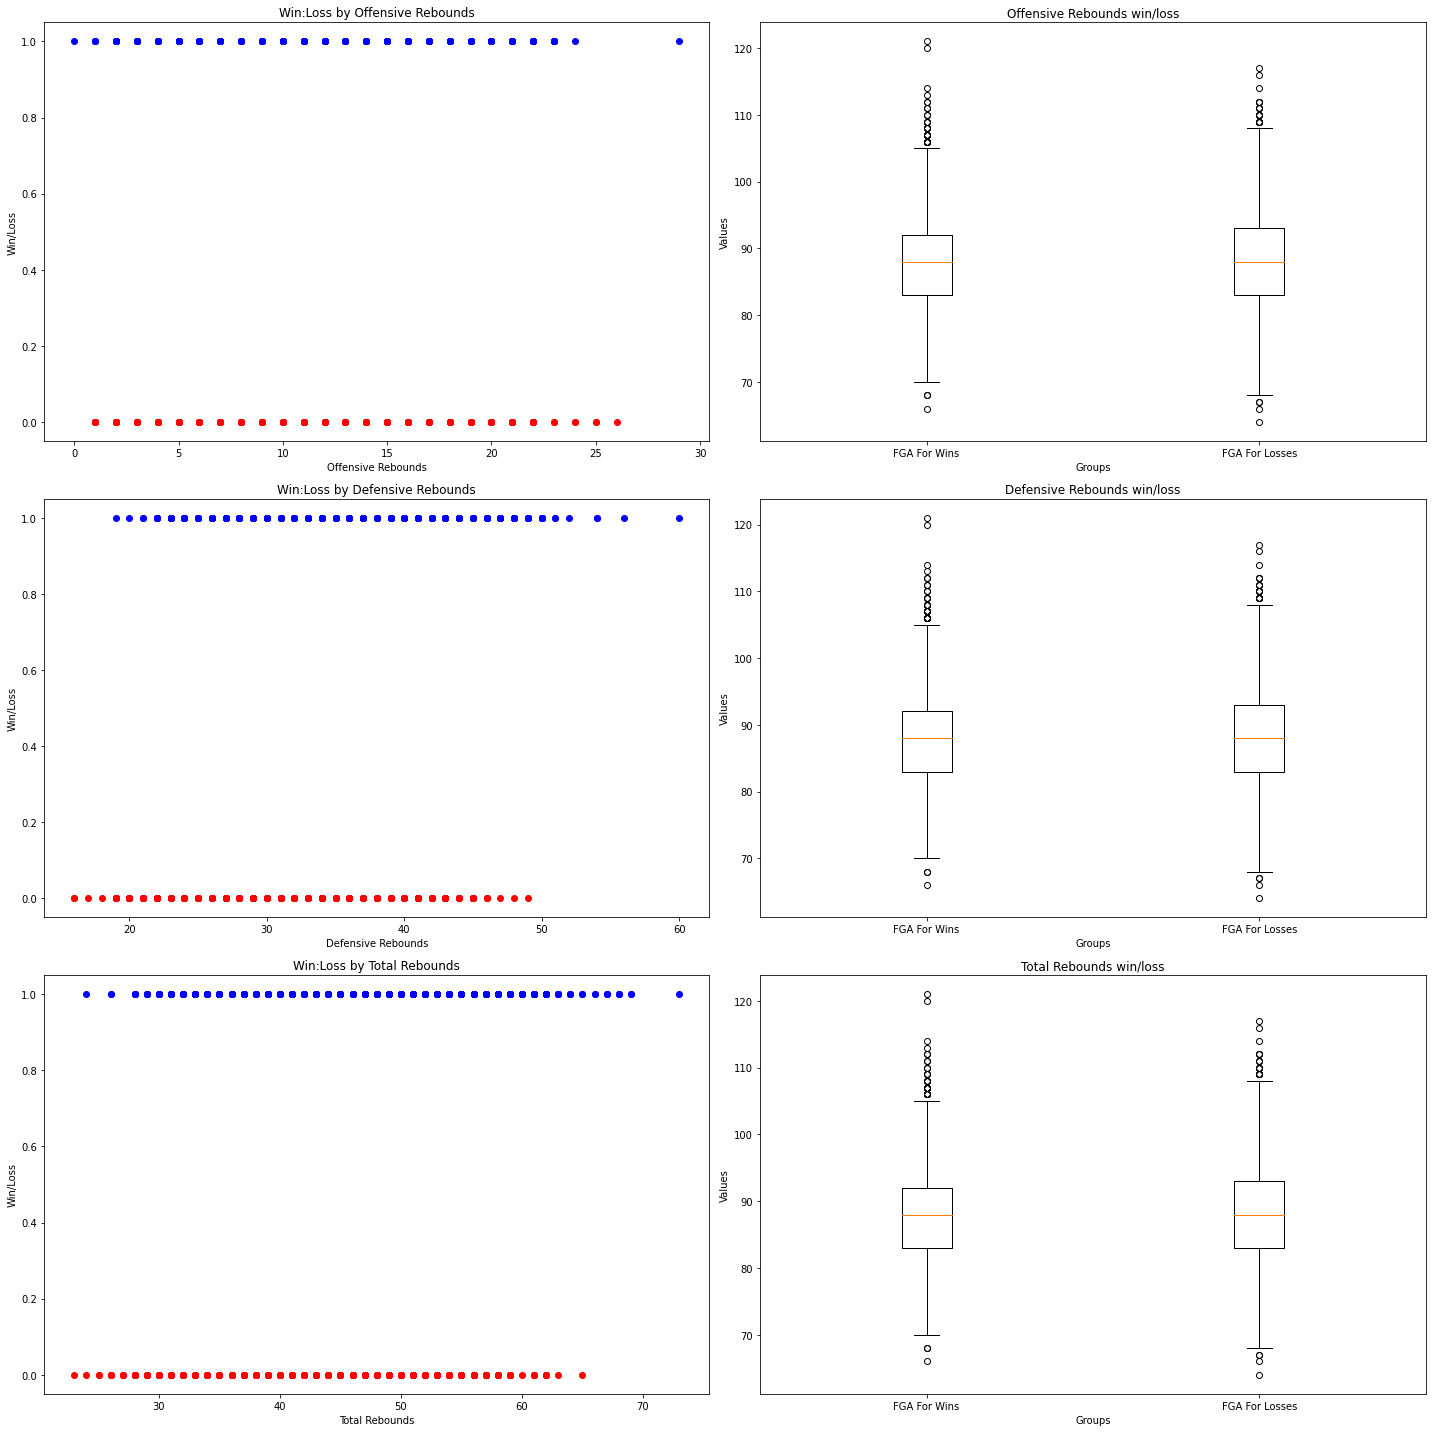

In [10]:
attList = [(losses.OREB, wins.OREB, 'Offensive Rebounds'), (losses.DREB, wins.DREB, 'Defensive Rebounds'), (losses.REB, wins.REB, 'Total Rebounds')]
triStatPlots(attList)

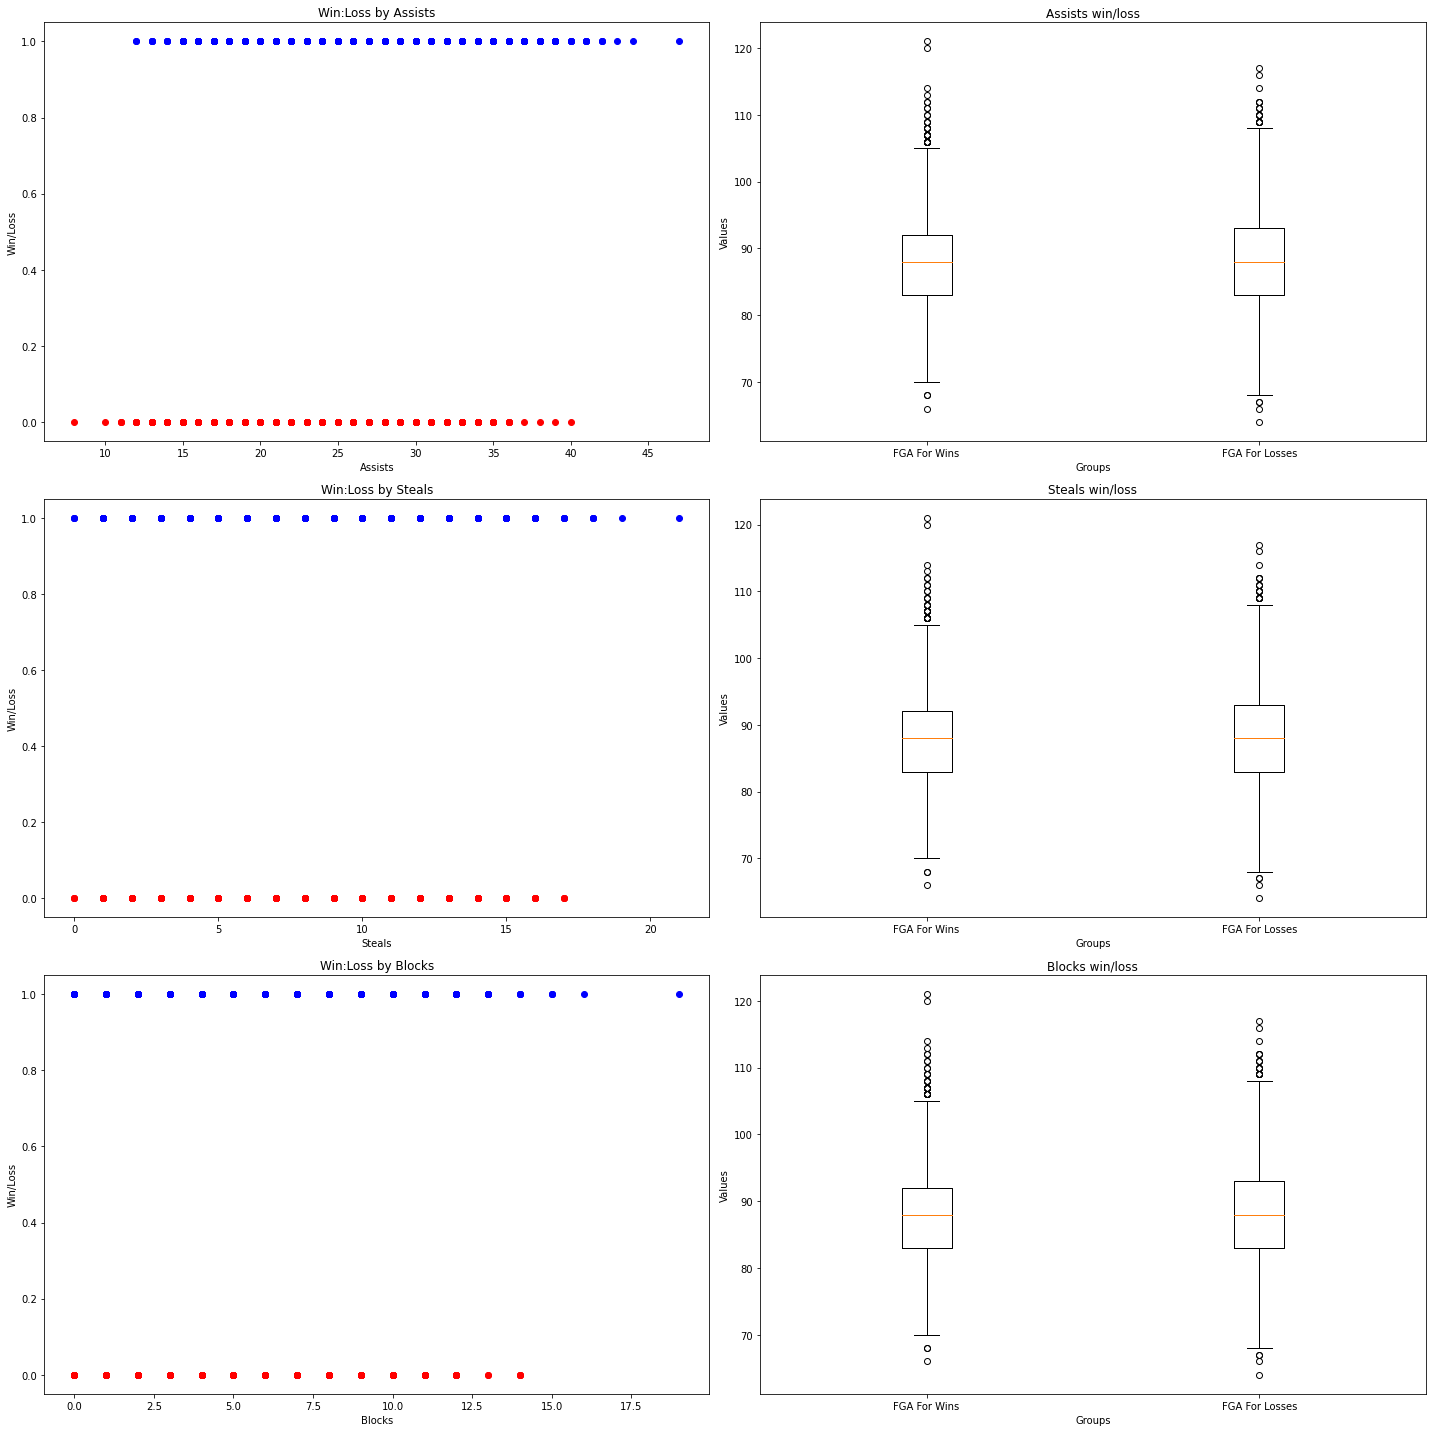

In [11]:
attList = [(losses.AST, wins.AST, 'Assists'), (losses.STL, wins.STL, 'Steals'), (losses.BLK, wins.BLK, 'Blocks')]
triStatPlots(attList)

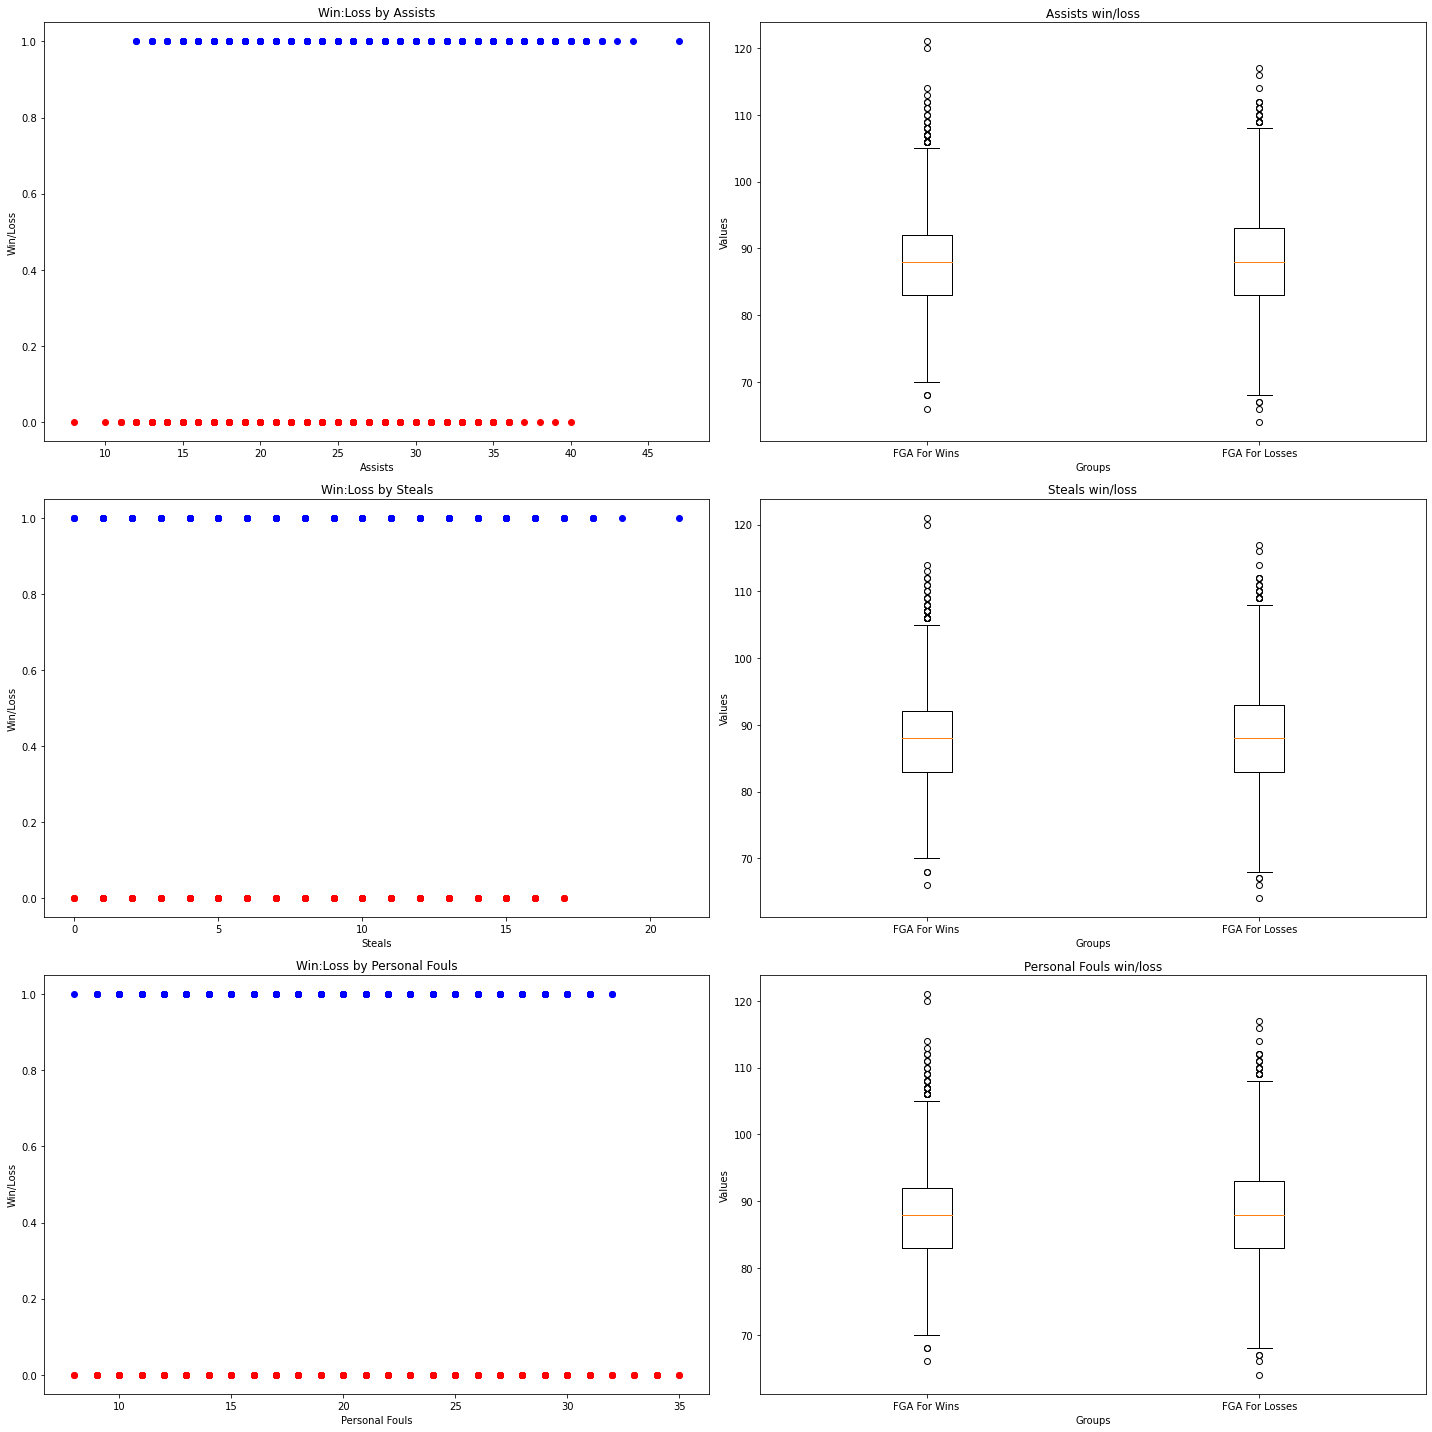

In [12]:
attList = [(losses.AST, wins.AST, 'Assists'), (losses.STL, wins.STL, 'Steals'), (losses.PF, wins.PF, 'Personal Fouls')]
triStatPlots(attList)

In [13]:
def create_ranges(highest, lowest, num_ranges):
    # Calculate the range size
    range_size = (highest - lowest) / num_ranges
    
    # Generate ranges
    ranges = []
    start = lowest
    for i in range(num_ranges):
        end = start + range_size
        # Ensure the last range ends at the highest value
        if i == num_ranges - 1:
            end = highest
        ranges.append((start, end))
        start = end

    return ranges

In [14]:
def count_values_in_ranges(array, ranges):
    counts = [0] * len(ranges)

    for value in array:
        for i, (start, end) in enumerate(ranges):
            if start <= value < end:
                counts[i] += 1
                break  # No need to check further ranges

    return counts

In [15]:
def create_side_by_side_bar_graph(ranges, win_values, loss_values, title, xlab):
    num_ranges = len(ranges)
    bar_width = 0.35
    index = range(num_ranges)
    
    fig, ax = plt.subplots()
    
    # Create bars for win values
    win_bars = ax.bar(index, win_values, bar_width, label='Win')
    
    # Create bars for loss values
    loss_bars = ax.bar([i + bar_width for i in index], loss_values, bar_width, label='Loss')
    
    ax.set_xlabel(xlab)
    ax.set_ylabel('Amount of games')
    ax.set_title(title)
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels([f"({round(range[0],1)}-{round(range[1],1)})" for range in ranges], fontsize=8)
    ax.legend()
    
    plt.show()

In [16]:
def create_2bar_stat(win_stat, loss_stat, num_ranges, title, xlab):
    #find biggest max and lowest min between both stats 
    highest = max(max(win_stat), max(loss_stat))
    lowest = min(min(win_stat), min(loss_stat))
    
    #find the ranges between max and min
    ranges = create_ranges(highest, lowest, num_ranges)
    
    #coutn how many belong in each range
    win_values = count_values_in_ranges(win_stat, ranges)
    loss_values = count_values_in_ranges(loss_stat, ranges)

    #create side by side bar graph for the stat
    create_side_by_side_bar_graph(ranges, win_values, loss_values, title, xlab)

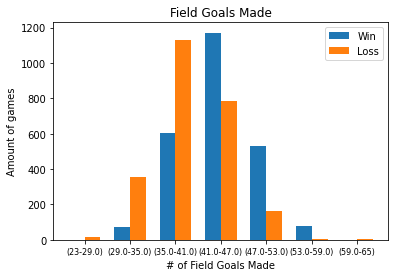

In [17]:
create_2bar_stat(wins.FGM, losses.FGM, 7, "Field Goals Made", "# of Field Goals Made")

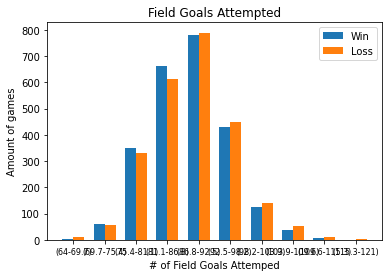

In [18]:
create_2bar_stat(wins.FGA, losses.FGA, 10, "Field Goals Attempted", "# of Field Goals Attemped")

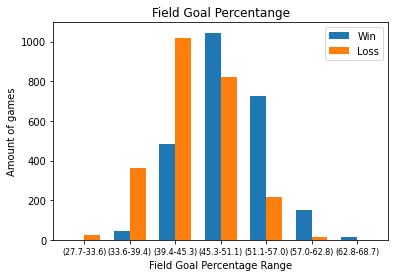

In [19]:
create_2bar_stat(wins.FGpercent, losses.FGpercent, 7, "Field Goal Percentange", "Field Goal Percentage Range")

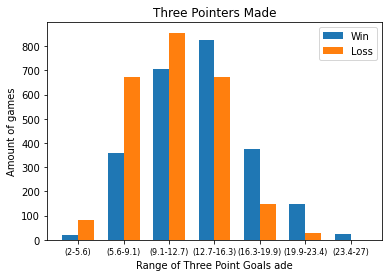

In [20]:
create_2bar_stat(wins.threeMade, losses.threeMade, 7, "Three Pointers Made", "Range of Three Point Goals ade")

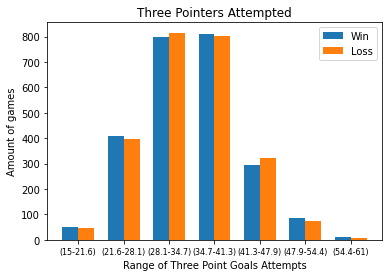

In [21]:
create_2bar_stat(wins.threeAtt, losses.threeAtt, 7, "Three Pointers Attempted", "Range of Three Point Goals Attempts")

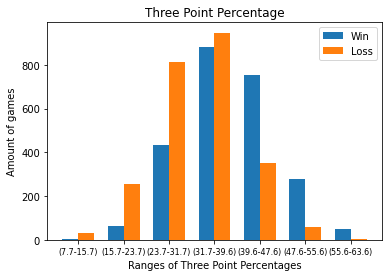

In [22]:
create_2bar_stat(wins.threePcent, losses.threePcent, 7, "Three Point Percentage", "Ranges of Three Point Percentages")

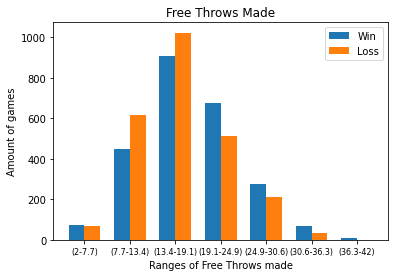

In [23]:
create_2bar_stat(wins.FTM, losses.FTM, 7, "Free Throws Made", "Ranges of Free Throws made")

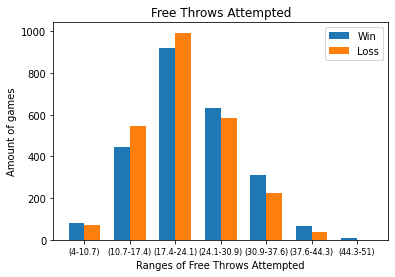

In [24]:
create_2bar_stat(wins.FTA, losses.FTA, 7, "Free Throws Attempted", "Ranges of Free Throws Attempted")

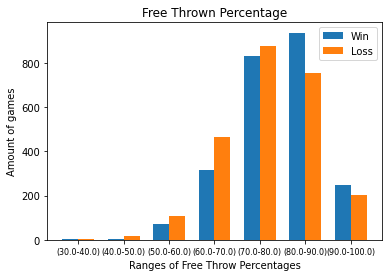

In [25]:
create_2bar_stat(wins.ftpercent, losses.ftpercent, 7, "Free Thrown Percentage", "Ranges of Free Throw Percentages")

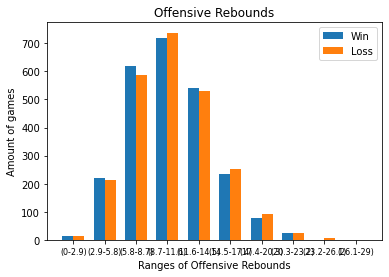

In [26]:
create_2bar_stat(wins.OREB, losses.OREB, 10, "Offensive Rebounds", "Ranges of Offensive Rebounds")

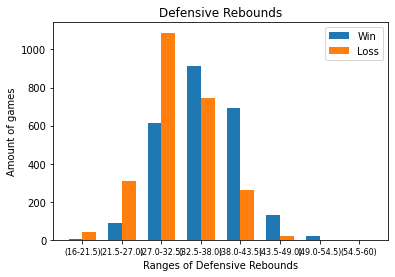

In [27]:
create_2bar_stat(wins.DREB, losses.DREB, 8, "Defensive Rebounds", "Ranges of Defensive Rebounds")

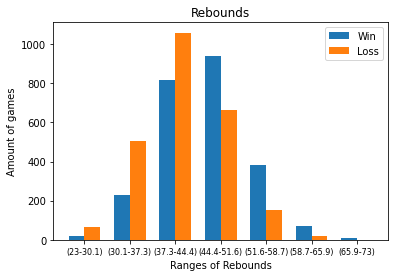

In [28]:
create_2bar_stat(wins.REB, losses.REB, 7, "Rebounds", "Ranges of Rebounds")

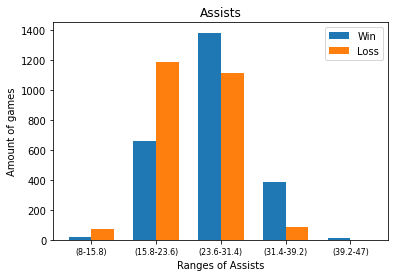

In [29]:
create_2bar_stat(wins.AST, losses.AST, 5, "Assists", "Ranges of Assists")

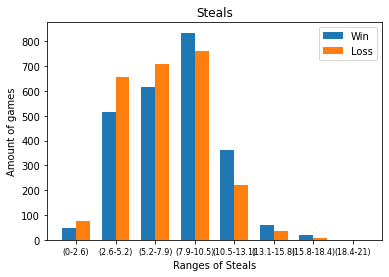

In [30]:
create_2bar_stat(wins.STL, losses.STL, 8, "Steals", "Ranges of Steals")

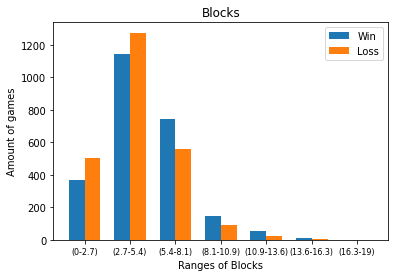

In [31]:
create_2bar_stat(wins.BLK, losses.BLK, 7, "Blocks", "Ranges of Blocks")

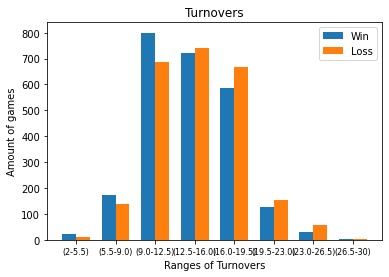

In [32]:
create_2bar_stat(wins.TOV, losses.TOV, 8, "Turnovers", "Ranges of Turnovers")

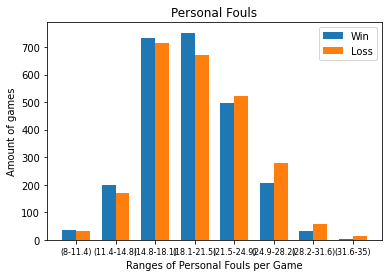

In [33]:
create_2bar_stat(wins.PF, losses.PF, 8, "Personal Fouls", "Ranges of Personal Fouls per Game")